## Capstone Prep: Data Exploration

#### The purpose of this notebook is to examine one of the possible sources of data for the Thinkful data science capstone. The data are derived from an IBM Watson Analytics sample dataset, found here: https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline
from pandas.tools.plotting import scatter_matrix

In [2]:
churn_data = pd.read_csv('/Users/amybrown/Thinkful/Capstone/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
churn_data.shape

(7043, 21)

In [4]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
churn_data['SeniorCitizen'] = churn_data['SeniorCitizen'].astype(str)
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
print(churn_data.head(10)) 

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female             0     Yes         No       1           No   
1  5575-GNVDE    Male             0      No         No      34          Yes   
2  3668-QPYBK    Male             0      No         No       2          Yes   
3  7795-CFOCW    Male             0      No         No      45           No   
4  9237-HQITU  Female             0      No         No       2          Yes   
5  9305-CDSKC  Female             0      No         No       8          Yes   
6  1452-KIOVK    Male             0      No        Yes      22          Yes   
7  6713-OKOMC  Female             0      No         No      10           No   
8  7892-POOKP  Female             0     Yes         No      28          Yes   
9  6388-TABGU    Male             0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ...   DeviceProtection  \
0  No phone service             DSL             No  

In [7]:
print(churn_data.describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2277.717059
std      24.559481       30.090047   2266.795349
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    395.225000
50%      29.000000       70.350000   1391.150000
75%      55.000000       89.850000   3780.625000
max      72.000000      118.750000   8684.800000


In [8]:
categorical = churn_data.dtypes[churn_data.dtypes == 'object'].index
print(categorical)
churn_data[categorical].describe()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,9507-EXLTT,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [9]:
for col in churn_data:
    print(col)
    print(churn_data[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ..., '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
['0' '1']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27  5
 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68 32 55
 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit car

In [10]:
df_sex = pd.get_dummies(churn_data['gender'])
df_partner = pd.get_dummies(churn_data['Partner'], prefix='Partner',prefix_sep=':')
df_depend = pd.get_dummies(churn_data['Dependents'], prefix='Dependent',prefix_sep=':')
df_phone = pd.get_dummies(churn_data['PhoneService'], prefix='Phone',prefix_sep=':')
df_lines = pd.get_dummies(churn_data['MultipleLines'], prefix='Multi-lines',prefix_sep=':')
df_internet = pd.get_dummies(churn_data['InternetService'], prefix='Internet', prefix_sep=':')
df_secure = pd.get_dummies(churn_data['OnlineSecurity'], prefix='Security', prefix_sep=':')
df_backup =  pd.get_dummies(churn_data['OnlineBackup'], prefix='Backup', prefix_sep=':')
df_protect = pd.get_dummies(churn_data['DeviceProtection'], prefix='Protection', prefix_sep=':')
df_support = pd.get_dummies(churn_data['TechSupport'], prefix='Support', prefix_sep=':')
df_streamtv = pd.get_dummies(churn_data['StreamingTV'], prefix='StreamTV', prefix_sep=':')
df_streammov = pd.get_dummies(churn_data['StreamingMovies'], prefix='StreamMov', prefix_sep=':')
df_contract = pd.get_dummies(churn_data['Contract'], prefix='Contract', prefix_sep=':')
df_billing = pd.get_dummies(churn_data['PaperlessBilling'], prefix='PaperlessBill', prefix_sep=':')
df_payment = pd.get_dummies(churn_data['PaymentMethod'], prefix='Method', prefix_sep=':')
df_churn = pd.get_dummies(churn_data['Churn'], prefix='Churn',prefix_sep=':')

In [11]:
churn_dummies = pd.concat([churn_data, df_sex, df_partner, df_depend, df_phone, df_lines, df_internet,
                           df_secure, df_backup, df_protect, df_support, df_streamtv, df_streammov, df_contract,
                           df_billing, df_payment, df_churn], axis=1)

## Univariate Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117338358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119e65dd8>]], dtype=object)

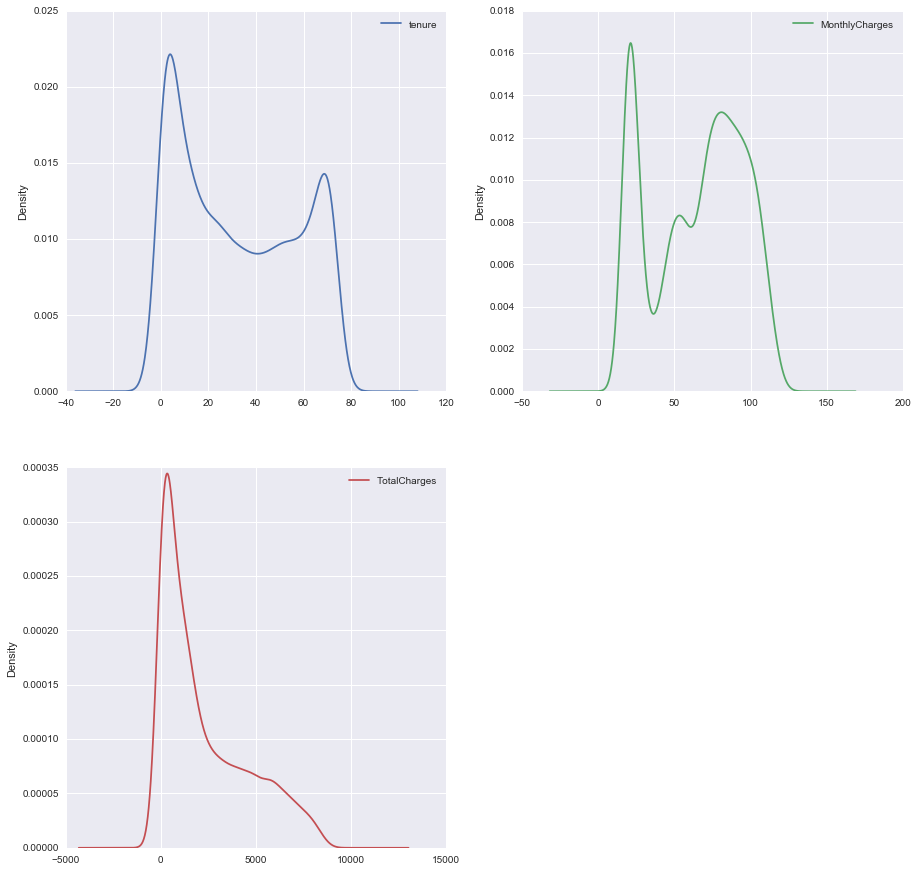

In [12]:
#density plots
churn_data.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(15,15))

<function matplotlib.pyplot.show>

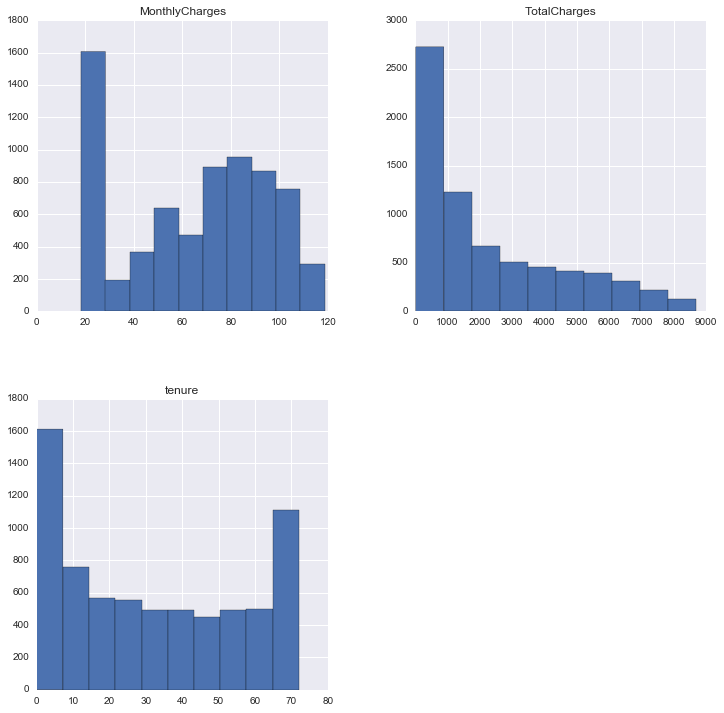

In [13]:
#histograms
churn_data.hist(figsize=(12,12))
plt.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b1c0eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b88be80>]], dtype=object)

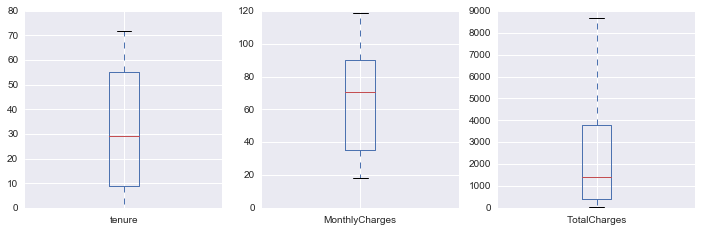

In [14]:
#boxplots
churn_data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))

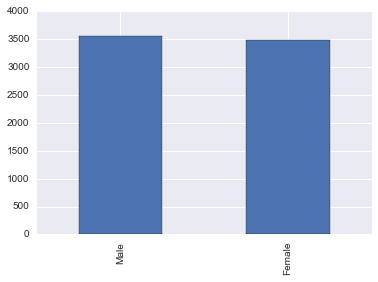

In [15]:
churn_data.gender.value_counts().plot(kind='bar')

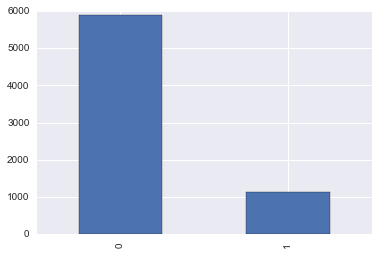

In [16]:
churn_data.SeniorCitizen.value_counts().plot(kind='bar')

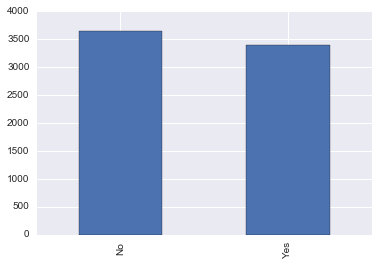

In [17]:
churn_data.Partner.value_counts().plot(kind='bar')

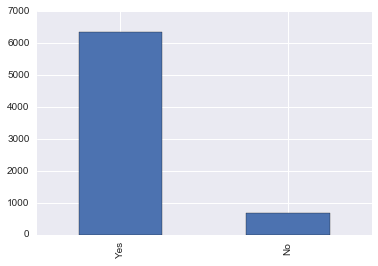

In [18]:
churn_data.PhoneService.value_counts().plot(kind='bar')

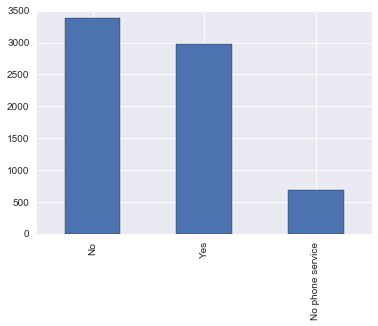

In [19]:
churn_data.MultipleLines.value_counts().plot(kind='bar')

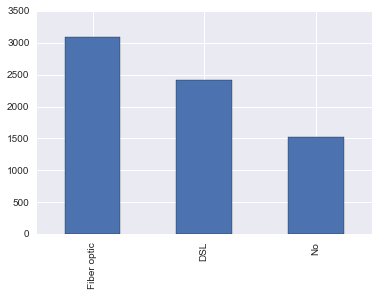

In [20]:
churn_data.InternetService.value_counts().plot(kind='bar')

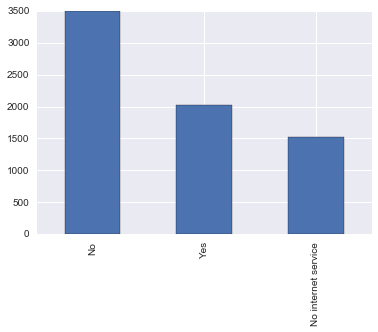

In [21]:
churn_data.OnlineSecurity.value_counts().plot(kind='bar')

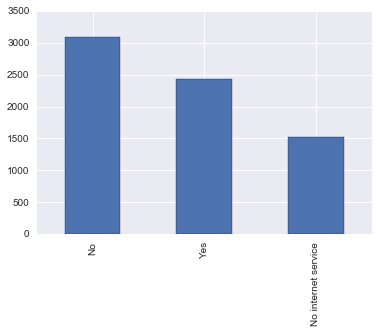

In [22]:
churn_data.OnlineBackup.value_counts().plot(kind='bar')

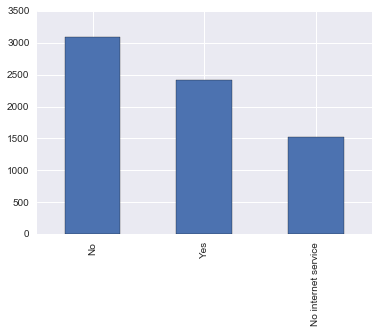

In [23]:
churn_data.DeviceProtection.value_counts().plot(kind='bar')

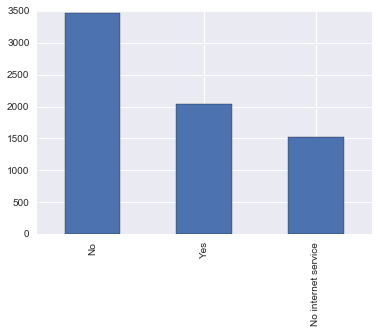

In [24]:
churn_data.TechSupport.value_counts().plot(kind='bar')

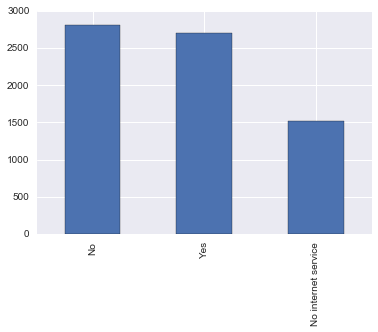

In [25]:
churn_data.StreamingTV.value_counts().plot(kind='bar')

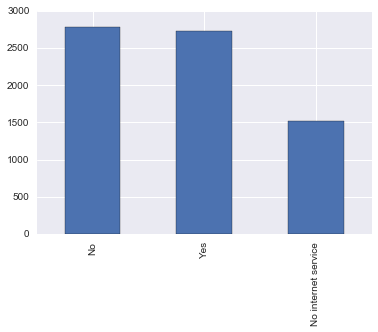

In [26]:
churn_data.StreamingMovies.value_counts().plot(kind='bar')

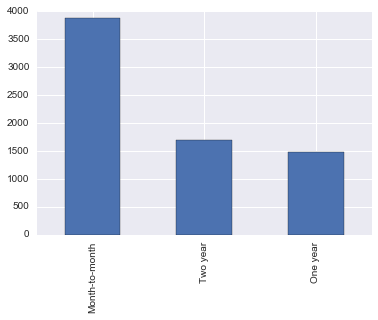

In [27]:
churn_data.Contract.value_counts().plot(kind='bar')

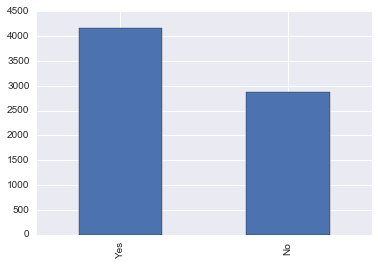

In [28]:
churn_data.PaperlessBilling.value_counts().plot(kind='bar')

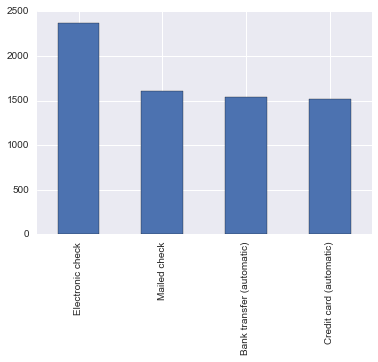

In [29]:
churn_data.PaymentMethod.value_counts().plot(kind='bar')

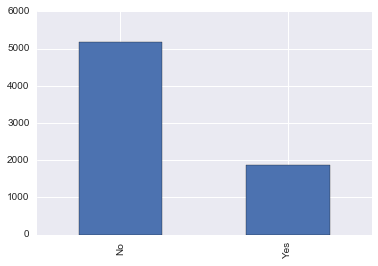

In [30]:
churn_data.Churn.value_counts().plot(kind='bar')

Churn
No     [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
Yes    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

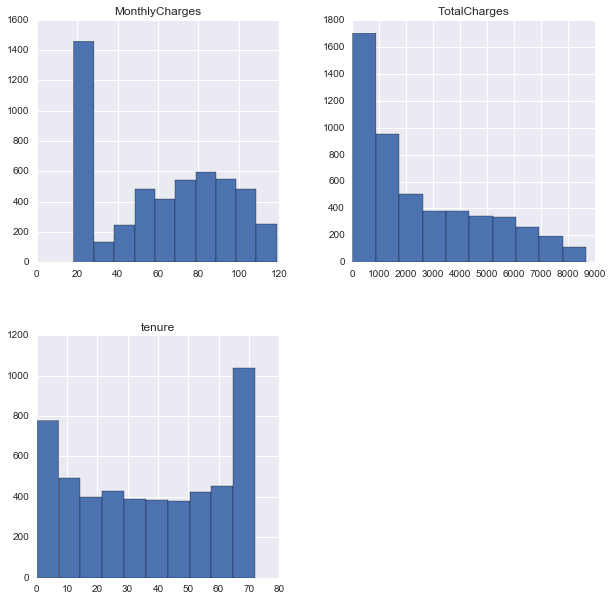

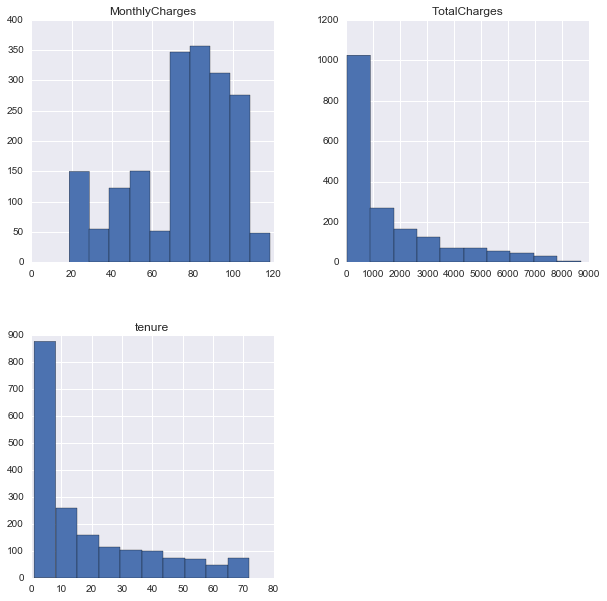

In [31]:
# feature to class: distributions of each continuous feature by class
churn_data.groupby('Churn').hist(figsize=(10,10))

## Bivariate Plots: Feature to Feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11df5fac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ec89e80>]], dtype=object)

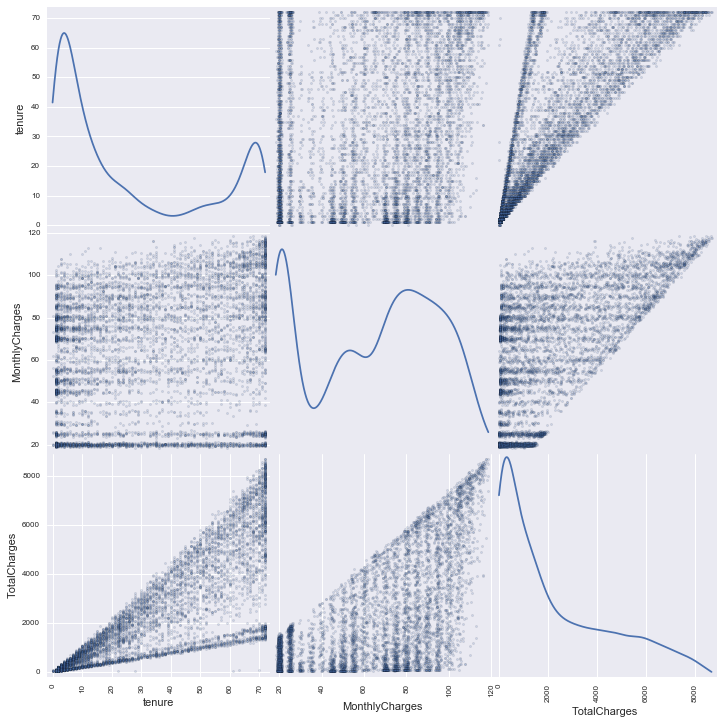

In [32]:
scatter_matrix(churn_data, alpha=0.2, figsize=(12, 12), diagonal='kde')

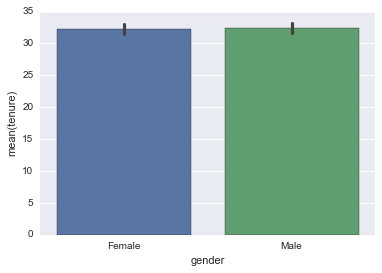

In [33]:
sb.barplot(x='gender',y='tenure', data=churn_data)

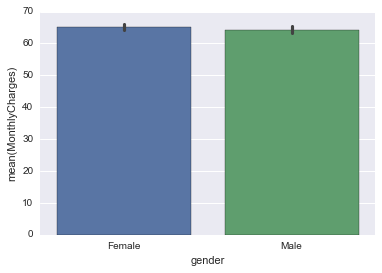

In [34]:
sb.barplot(x='gender', y='MonthlyCharges',data=churn_data)

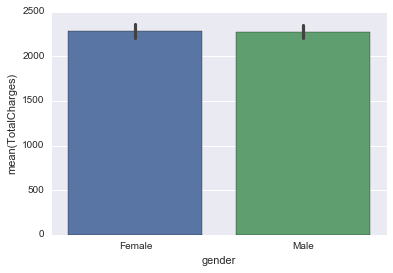

In [35]:
sb.barplot(x='gender', y='TotalCharges', data=churn_data) 

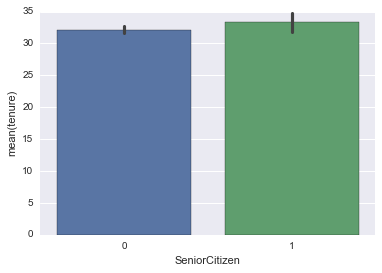

In [36]:
sb.barplot(x='SeniorCitizen', y='tenure', data=churn_data)

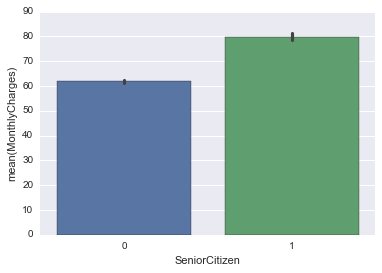

In [37]:
sb.barplot(x='SeniorCitizen', y='MonthlyCharges', data=churn_data)

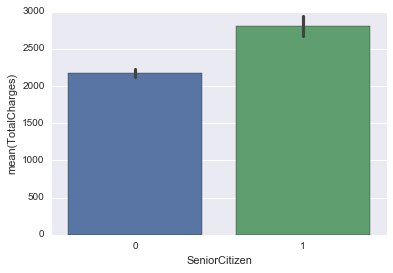

In [38]:
sb.barplot(x='SeniorCitizen', y='TotalCharges', data=churn_data)

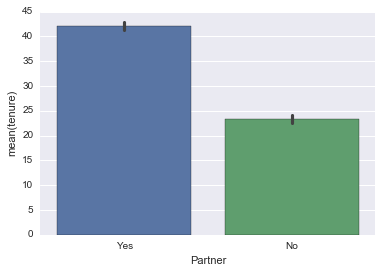

In [39]:
sb.barplot(x='Partner', y='tenure', data=churn_data)

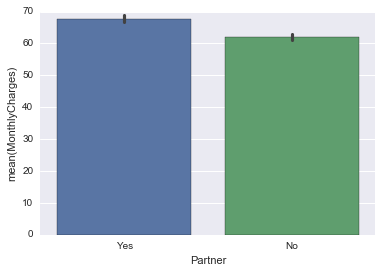

In [40]:
sb.barplot(x='Partner', y='MonthlyCharges', data=churn_data)

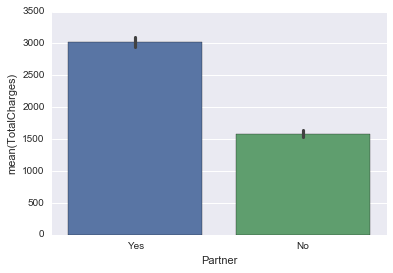

In [41]:
sb.barplot(x='Partner', y='TotalCharges', data=churn_data)

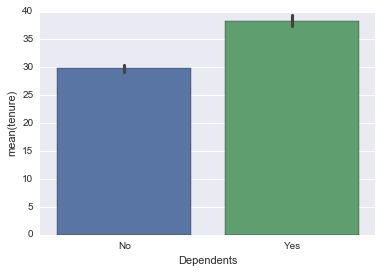

In [42]:
sb.barplot(x='Dependents', y='tenure', data=churn_data)

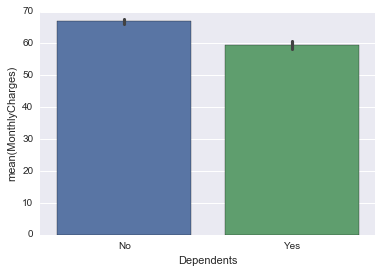

In [43]:
sb.barplot(x='Dependents', y='MonthlyCharges', data=churn_data)

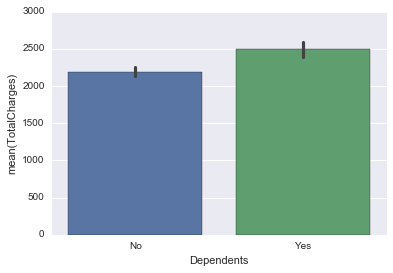

In [44]:
sb.barplot(x='Dependents', y='TotalCharges', data=churn_data)

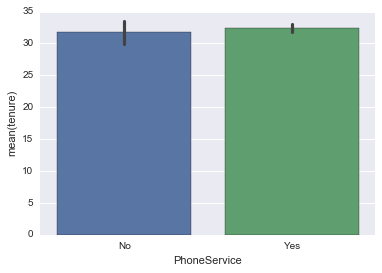

In [45]:
sb.barplot(x='PhoneService', y='tenure', data=churn_data)

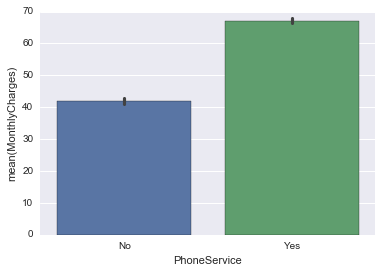

In [46]:
sb.barplot(x='PhoneService', y='MonthlyCharges', data=churn_data)

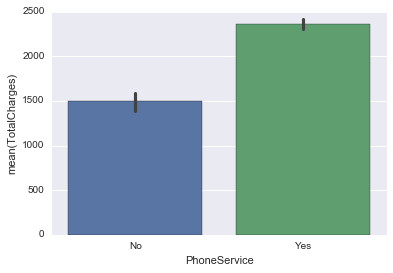

In [47]:
sb.barplot(x='PhoneService', y='TotalCharges', data=churn_data)

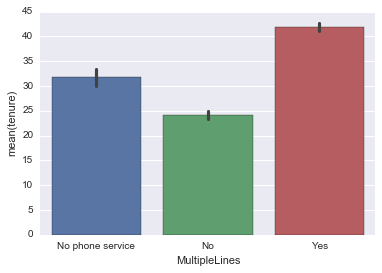

In [48]:
sb.barplot(x='MultipleLines', y='tenure', data=churn_data)

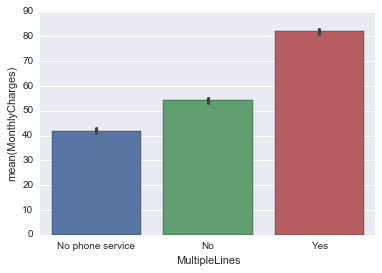

In [49]:
sb.barplot(x='MultipleLines', y='MonthlyCharges', data=churn_data)

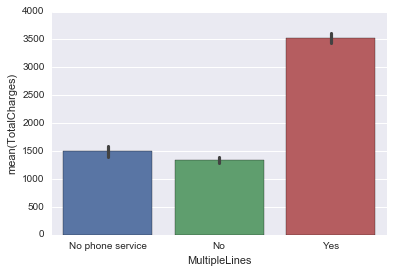

In [50]:
sb.barplot(x='MultipleLines', y='TotalCharges', data=churn_data)

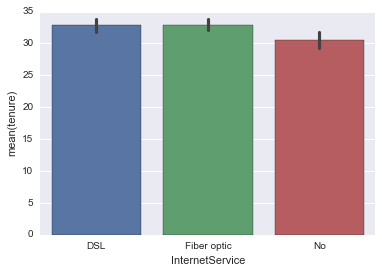

In [51]:
sb.barplot(x='InternetService', y='tenure', data=churn_data)

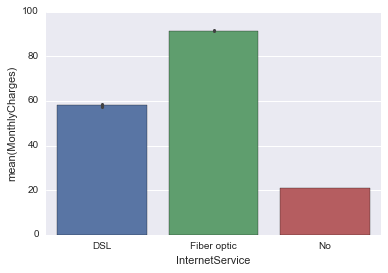

In [52]:
sb.barplot(x='InternetService', y='MonthlyCharges', data=churn_data)

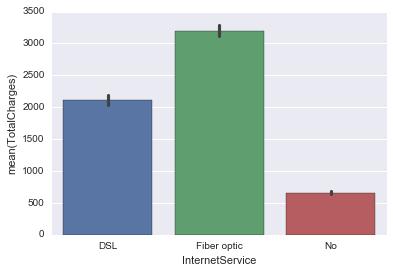

In [53]:
sb.barplot(x='InternetService', y='TotalCharges', data=churn_data)

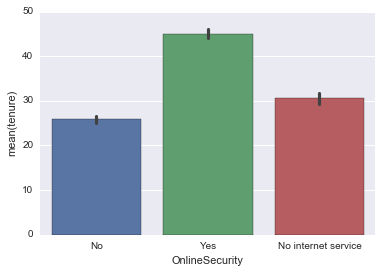

In [54]:
sb.barplot(x='OnlineSecurity', y='tenure', data=churn_data)

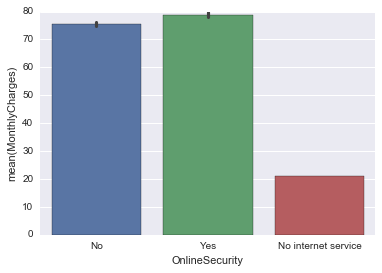

In [55]:
sb.barplot(x='OnlineSecurity', y='MonthlyCharges', data=churn_data)

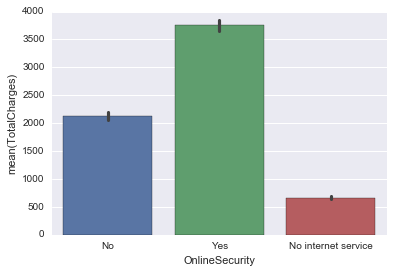

In [56]:
sb.barplot(x='OnlineSecurity', y='TotalCharges', data=churn_data)

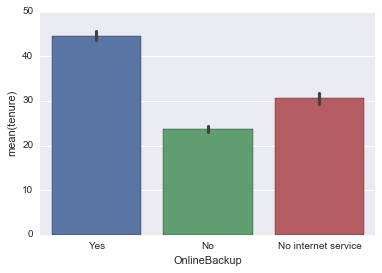

In [57]:
sb.barplot(x='OnlineBackup', y='tenure', data=churn_data)

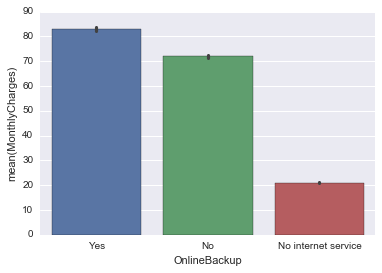

In [58]:
sb.barplot(x='OnlineBackup', y='MonthlyCharges', data=churn_data)

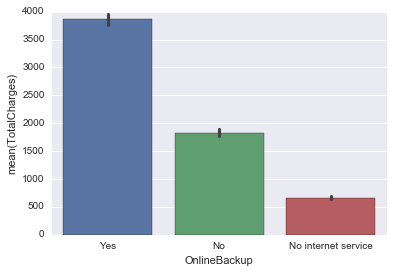

In [59]:
sb.barplot(x='OnlineBackup', y='TotalCharges', data=churn_data)

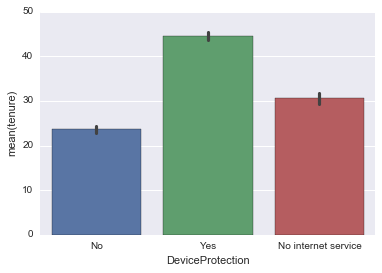

In [60]:
sb.barplot(x='DeviceProtection', y='tenure', data=churn_data)

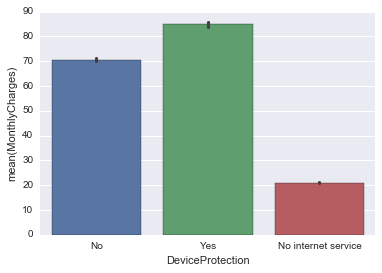

In [61]:
sb.barplot(x='DeviceProtection', y='MonthlyCharges', data=churn_data)

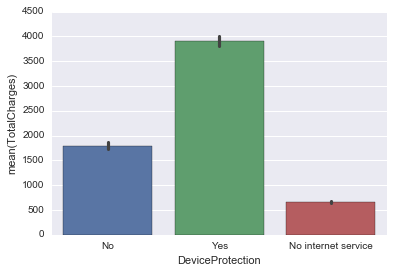

In [62]:
sb.barplot(x='DeviceProtection', y='TotalCharges', data=churn_data)

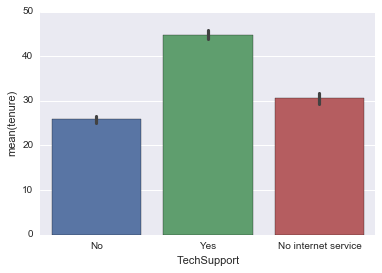

In [63]:
sb.barplot(x='TechSupport', y='tenure', data=churn_data)

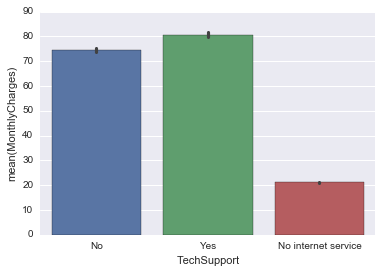

In [64]:
sb.barplot(x='TechSupport', y='MonthlyCharges', data=churn_data)

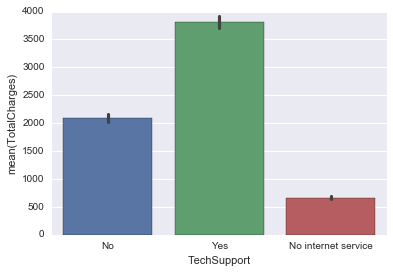

In [65]:
sb.barplot(x='TechSupport', y='TotalCharges', data=churn_data)

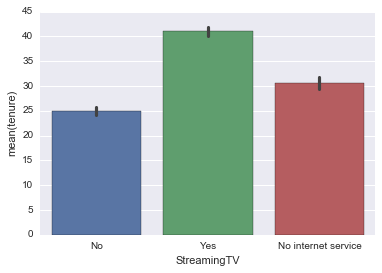

In [66]:
sb.barplot(x='StreamingTV', y='tenure', data=churn_data)

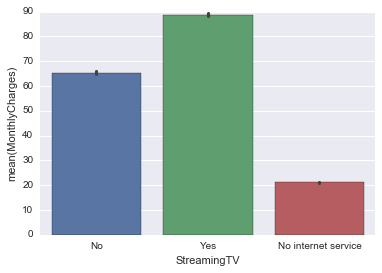

In [67]:
sb.barplot(x='StreamingTV', y='MonthlyCharges', data=churn_data)

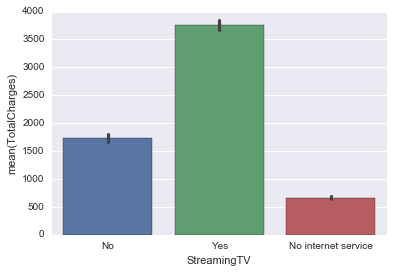

In [68]:
sb.barplot(x='StreamingTV', y='TotalCharges', data=churn_data)

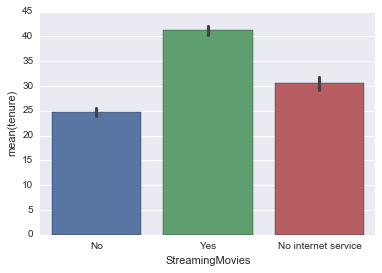

In [69]:
sb.barplot(x='StreamingMovies', y='tenure', data=churn_data)

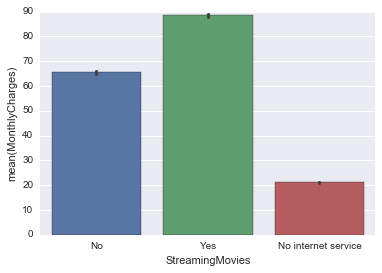

In [70]:
sb.barplot(x='StreamingMovies', y='MonthlyCharges', data=churn_data)

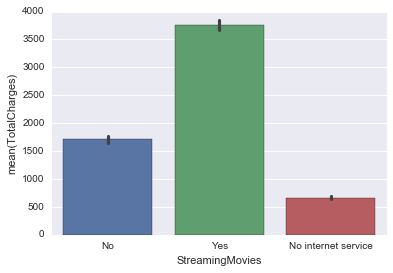

In [71]:
sb.barplot(x='StreamingMovies', y='TotalCharges', data=churn_data)

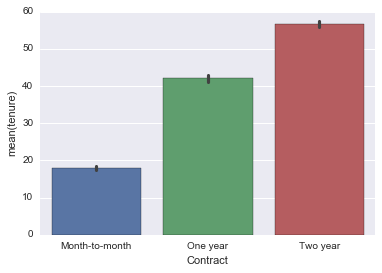

In [72]:
sb.barplot(x='Contract', y='tenure', data=churn_data)

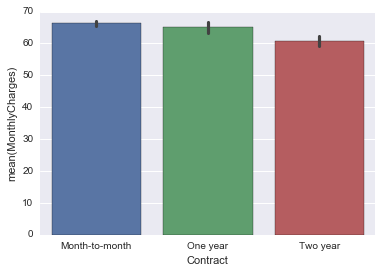

In [73]:
sb.barplot(x='Contract', y='MonthlyCharges', data=churn_data)

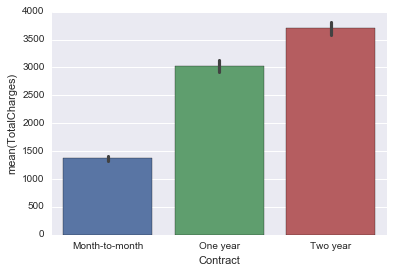

In [74]:
sb.barplot(x='Contract', y='TotalCharges', data=churn_data)

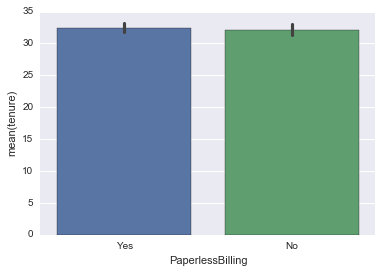

In [75]:
sb.barplot(x='PaperlessBilling', y='tenure', data=churn_data)

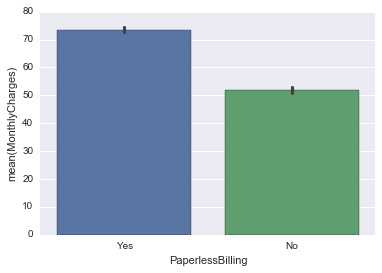

In [76]:
sb.barplot(x='PaperlessBilling', y='MonthlyCharges', data=churn_data)

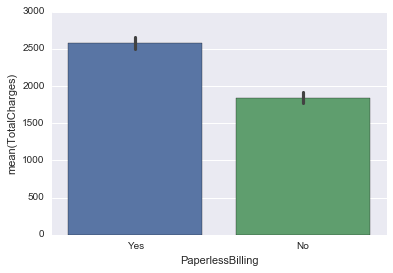

In [77]:
sb.barplot(x='PaperlessBilling', y='TotalCharges', data=churn_data)

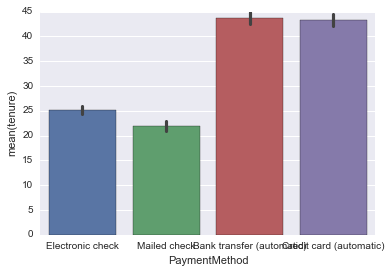

In [78]:
sb.barplot(x='PaymentMethod', y='tenure', data=churn_data)

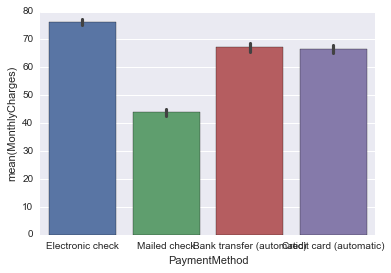

In [79]:
sb.barplot(x='PaymentMethod', y='MonthlyCharges', data=churn_data)

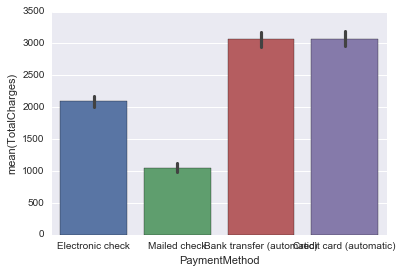

In [80]:
sb.barplot(x='PaymentMethod', y='TotalCharges', data=churn_data)

## Bivariate Plots: Class to Feature

Churn
No     [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
Yes    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

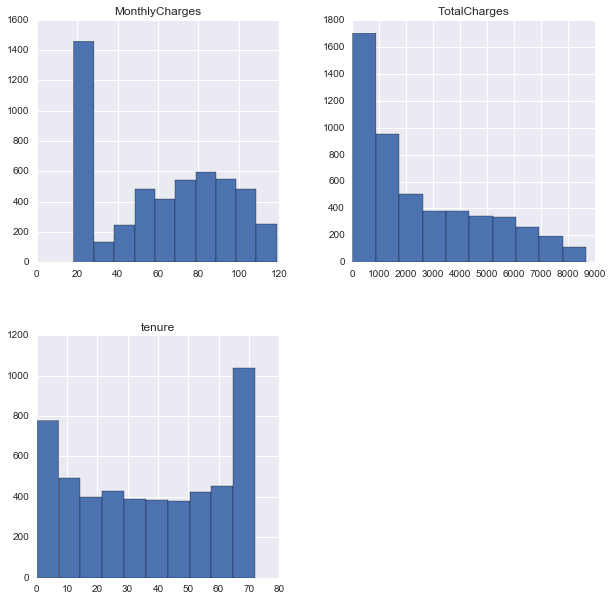

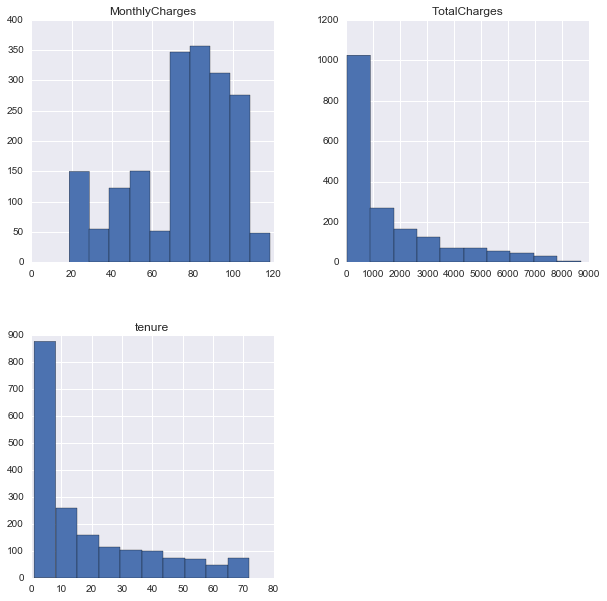

In [81]:
# feature to class: distributions of each continuous feature by class
churn_data.groupby('Churn').hist(figsize=(10,10))

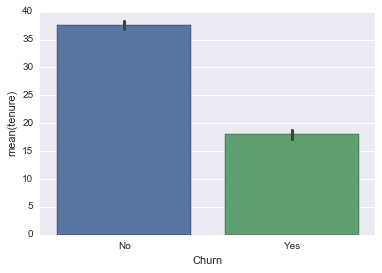

In [82]:
sb.barplot(x='Churn',y='tenure', data=churn_data)

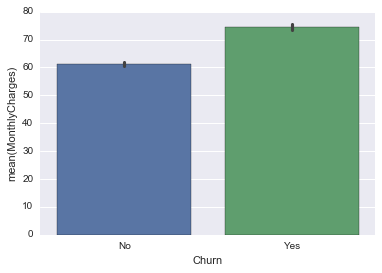

In [83]:
sb.barplot(x='Churn', y='MonthlyCharges',data=churn_data)

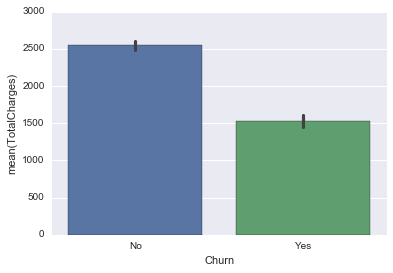

In [84]:
sb.barplot(x='Churn', y='TotalCharges', data=churn_data) 

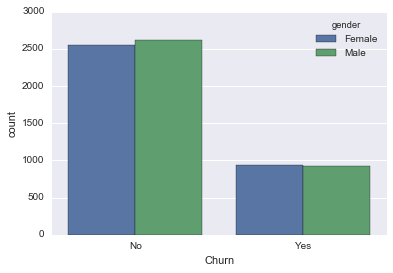

In [85]:
sb.countplot(x='Churn', hue='gender', data=churn_data)

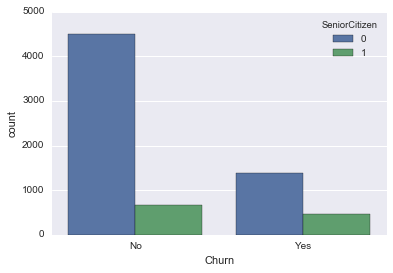

In [86]:
sb.countplot(x='Churn', hue='SeniorCitizen', data=churn_data)

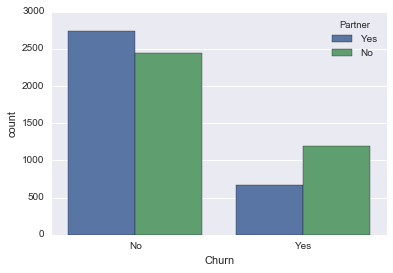

In [87]:
sb.countplot(x='Churn', hue='Partner', data=churn_data)

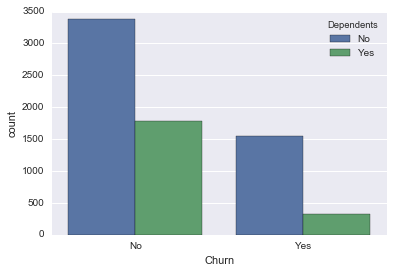

In [88]:
sb.countplot(x='Churn', hue='Dependents', data=churn_data)

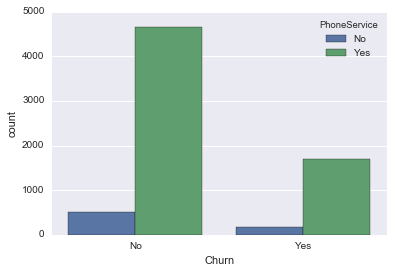

In [89]:
sb.countplot(x='Churn', hue='PhoneService', data=churn_data)

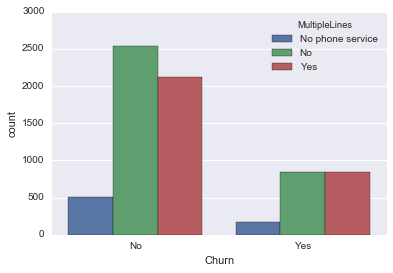

In [90]:
sb.countplot(x='Churn', hue='MultipleLines', data=churn_data)

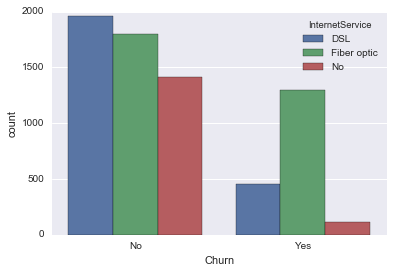

In [91]:
sb.countplot(x='Churn', hue='InternetService', data=churn_data)

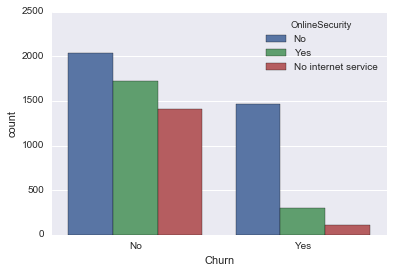

In [92]:
sb.countplot(x='Churn', hue='OnlineSecurity', data=churn_data)

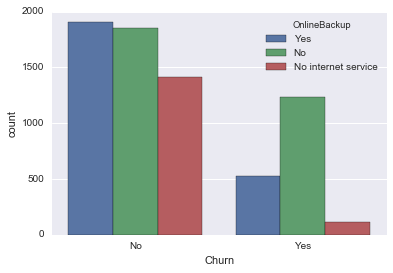

In [93]:
sb.countplot(x='Churn', hue='OnlineBackup', data=churn_data)

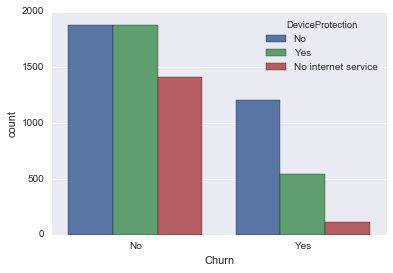

In [94]:
sb.countplot(x='Churn', hue='DeviceProtection', data=churn_data)

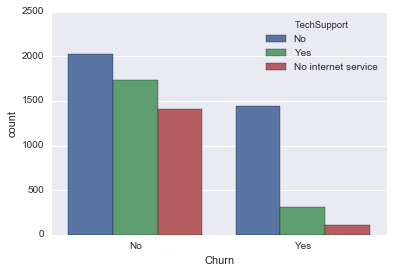

In [95]:
sb.countplot(x='Churn', hue='TechSupport', data=churn_data)

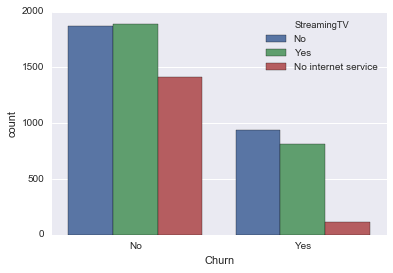

In [96]:
sb.countplot(x='Churn', hue='StreamingTV', data=churn_data)

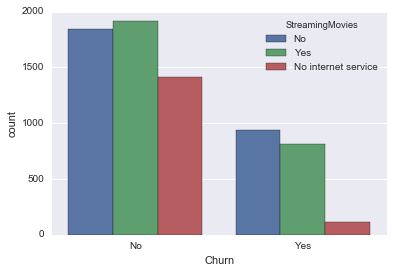

In [97]:
sb.countplot(x='Churn', hue='StreamingMovies', data=churn_data)

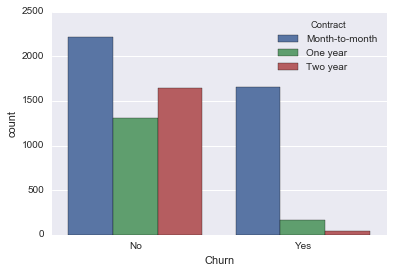

In [98]:
sb.countplot(x='Churn', hue='Contract', data=churn_data)

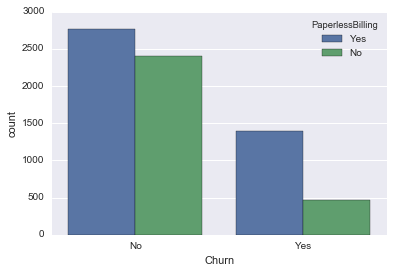

In [99]:
sb.countplot(x='Churn', hue='PaperlessBilling', data=churn_data)

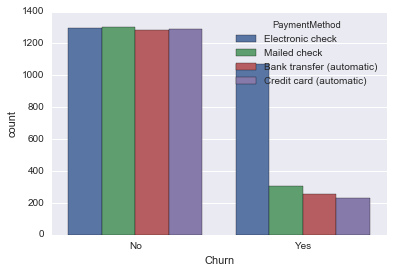

In [100]:
sb.countplot(x='Churn', hue='PaymentMethod', data=churn_data)